In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk('D:\Shivangi\SRM\3rd Year\5th Sem\DTAR Lab\DATASET'):
        print(dirname)

In [ ]:
train_path = r'\DATASET\TRAIN'
test_path = r'\DATASET\TEST'

## Import Libraries

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from glob import glob

## Visualization

In [7]:
x_data = [] 
y_data = [] 

for category in glob(os.path.join(train_path, '*')):
    for file in tqdm(glob(os.path.join(category, '*'))):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(os.path.basename(category))

data = pd.DataFrame({'image': x_data, 'label': y_data})

print("Data Shape:", data.shape)
print("Label Counts:", data['label'].value_counts())


100%|██████████| 9999/9999 [01:52<00:00, 89.00it/s] 


Data Shape: (22564, 2)
Label Counts: label
O    12565
R     9999
Name: count, dtype: int64


In [8]:
from collections import Counter
Counter(y_data)

Counter({'O': 12565, 'R': 9999})

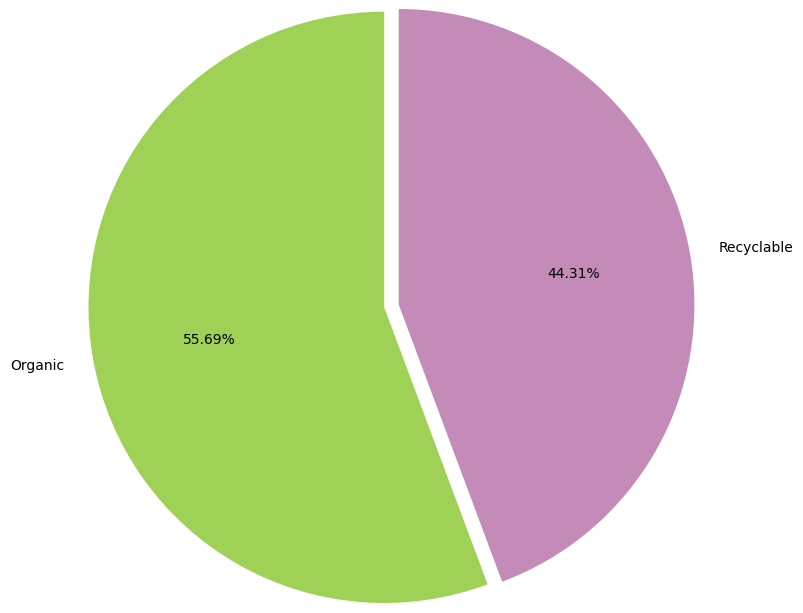

In [9]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

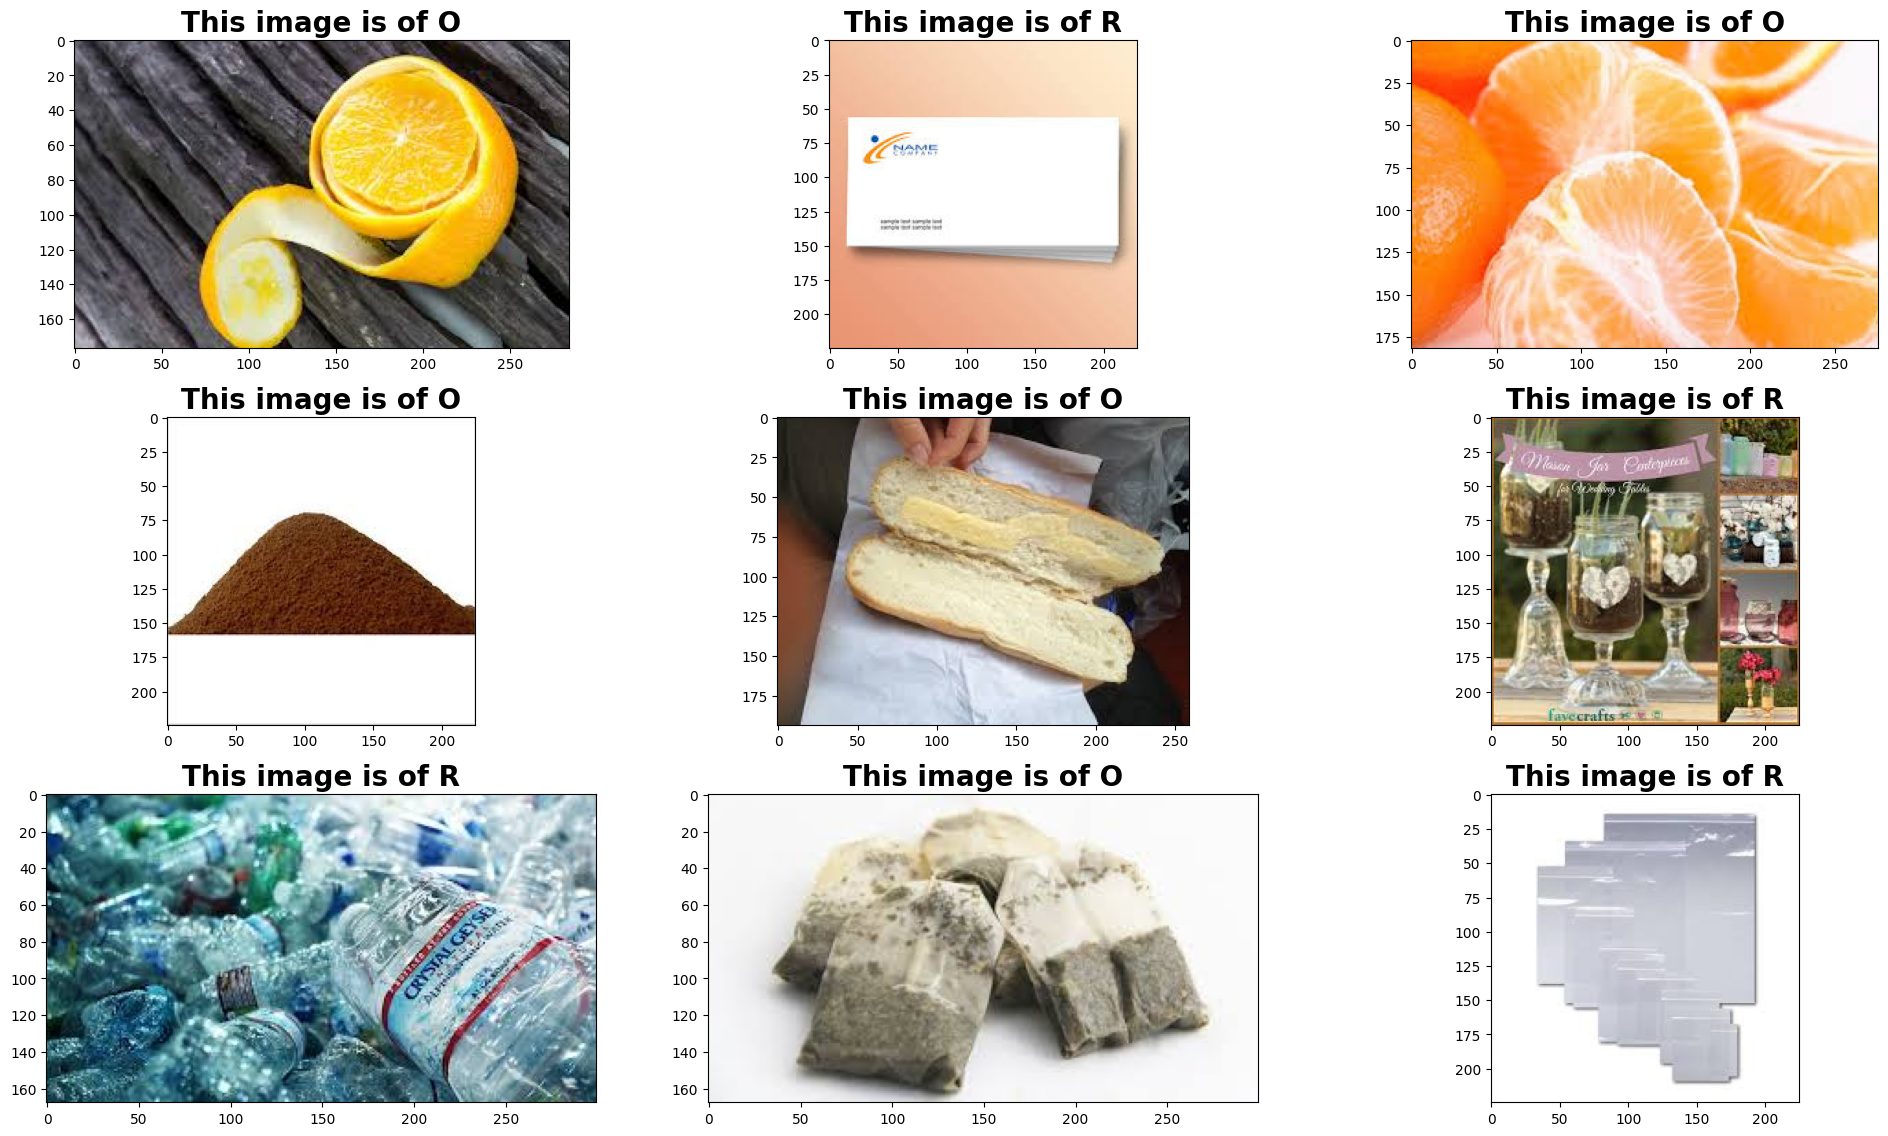

In [10]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index = np.random.randint(len(data))
    plt.title('This image is of {0}'.format(data.label.iloc[index]), fontdict={'size':20, 'weight':'bold'})
    plt.imshow(data.image.iloc[index])
    plt.tight_layout()


* O -> Organic
* R -> Recyclable

In [11]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


# Convolutional Neural Network - CNN

In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (128,128,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

batch_size = 256

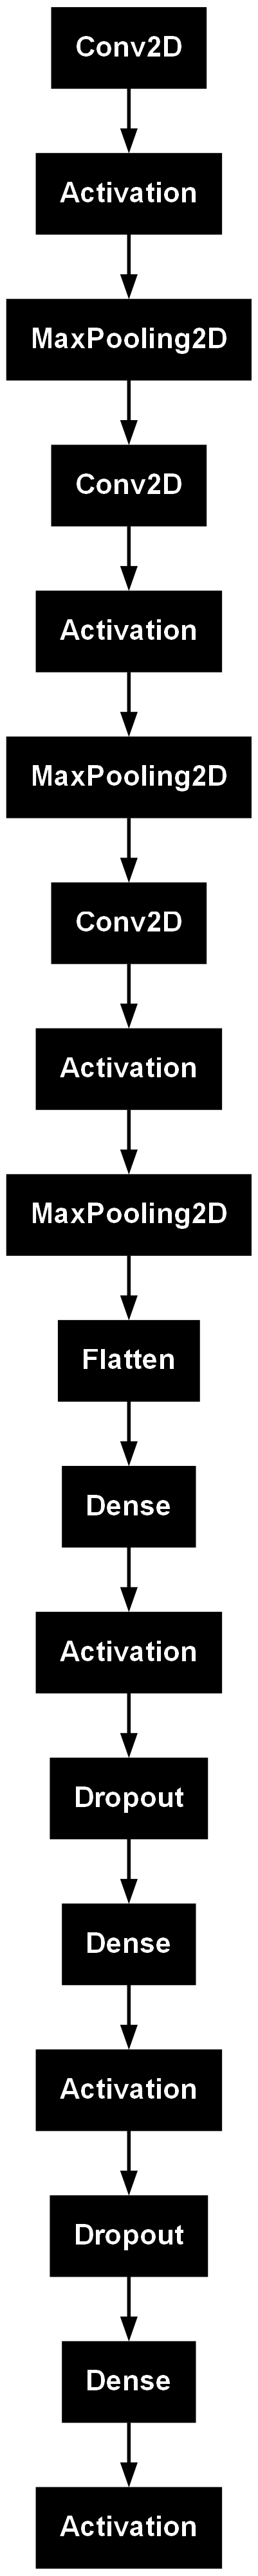

In [13]:
plot_model(model)

In [14]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [15]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (128,128),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (128,128),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [17]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 230s 3s/step - accuracy: 0.7119 - loss: 0.5757 - val_accuracy: 0.8571 - val_loss: 0.3474
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 79s 891ms/step - accuracy: 0.8247 - loss: 0.4106 - val_accuracy: 0.8583 - val_loss: 0.3412
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 80s 892ms/step - accuracy: 0.8476 - loss: 0.3736 - val_accuracy: 0.8826 - val_loss: 0.3000
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 78s 879ms/step - accuracy: 0.8525 - loss: 0.3585 - val_accuracy: 0.8969 - val_loss: 0.2672
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 77s 868ms/step - accuracy: 0.8613 - loss: 0.3433 - val_accuracy: 0.8981 - val_loss: 0.2656
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 77s 868ms/step - accuracy: 0.8831 - loss: 0.3012 - val_accuracy: 0.9049 - val_loss: 0.2499
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 80s 893ms/step - accuracy: 0.8920 - loss: 0.2715 - val_accuracy: 0.9093 - val_loss: 0.2396
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 79s 881ms/step - accuracy: 0.8999 - loss: 0.2523 - val_accura

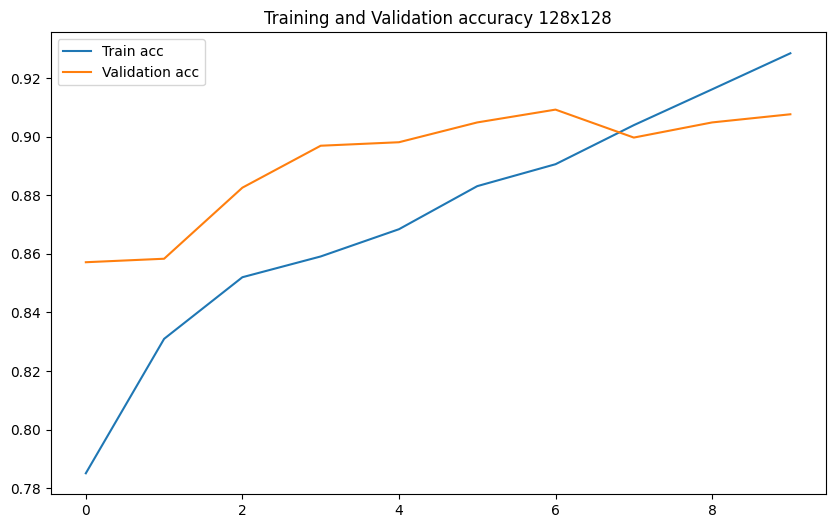

In [22]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.title("Training and Validation accuracy 128x128")
plt.show()

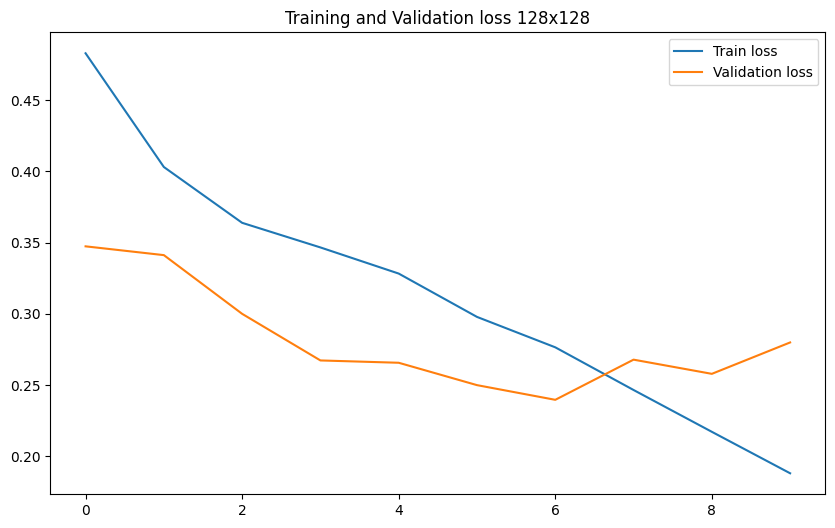

In [23]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.title("Training and Validation loss 128x128")
plt.show()

## Model Prediction

In [20]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 25088, but received input with shape (1, 86528)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 224, 224, 3), dtype=uint8)
  • training=False
  • mask=None

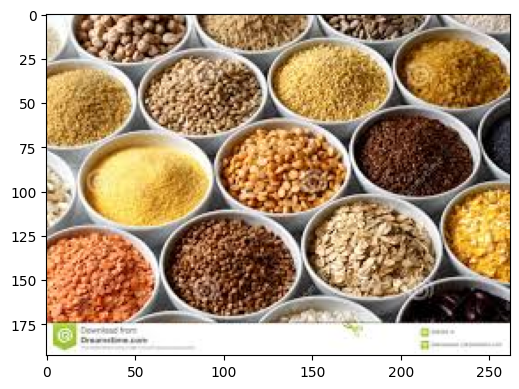

In [ ]:
test_img = cv2.imread(r"\DATASET\TEST\O\O_13316.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
This image -> Recyclable


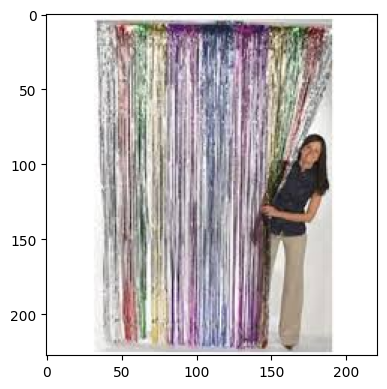

In [47]:
test_img = cv2.imread(r"D:\Shivangi\SRM\3rd Year\5th Sem\DTAR Lab\DATASET\TEST\R\R_10284.jpg")
predict_func(test_img)